In [36]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.tools.monitor import job_monitor

In [37]:
from matplotlib import style
style.use('dark_background')

SIMPLE CIRQUIT



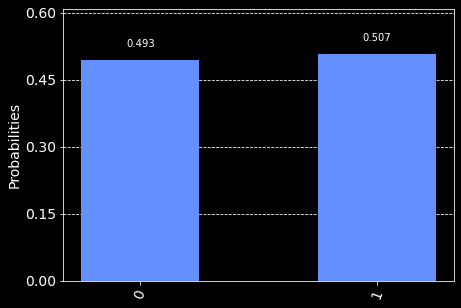

In [38]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure([0], [0])
qc.draw('mpl')
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, qasm_simulator, shots = 1000)
output = job.result()
counts = output.get_counts(qc)
plot_histogram(counts)

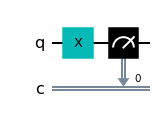

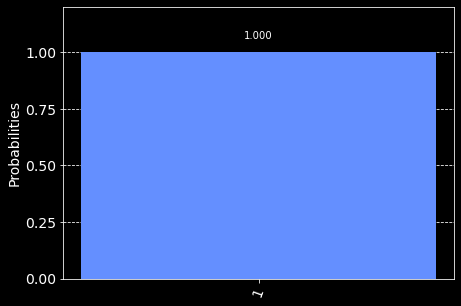

In [39]:
qc1 = QuantumCircuit(1,1)
qc1.x(0)
qc1.measure([0], [0])
display(qc1.draw('mpl'))
counts = execute(qc1, qasm_simulator, shots = 10000).result().get_counts(qc1)
plot_histogram(counts)

MULTI QUBIT CIRQUIT

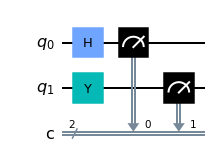

In [40]:
qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.y(1)
qc2.measure([0,1], [0,1])
display(qc2.draw('mpl'))


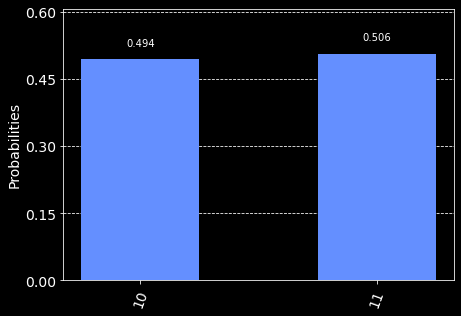

In [41]:
counts = execute(qc2, qasm_simulator, shots = 10000).result().get_counts(qc2)
plot_histogram(counts)

CNOT GATE

In [55]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.tools.monitor import job_monitor


In [56]:
from matplotlib import style
style.use('dark_background')

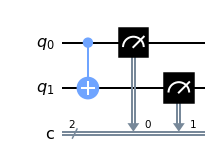

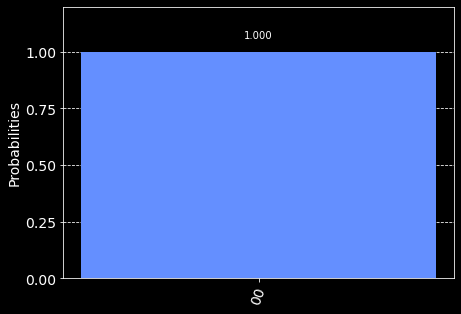

In [59]:
qc3 = QuantumCircuit(2,2)
qc3.cx(0,1)
qc3.measure([0,1], [0,1])
display(qc3.draw('mpl'))
counts = execute(qc3, qasm_simulator, shots = 10).result().get_counts(qc3)
plot_histogram(counts)


In [60]:
#now applying the  X gate first


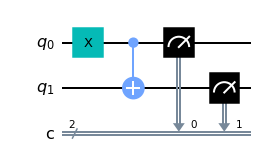

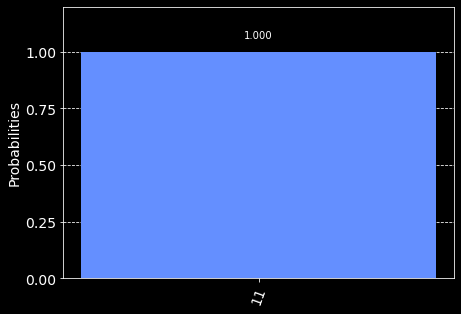

In [63]:
qc3 = QuantumCircuit(2,2)
qc3.x(0)
qc3.cx(0,1)
qc3.measure([0,1], [0,1])
display(qc3.draw('mpl'))
counts = execute(qc3, qasm_simulator, shots = 10).result().get_counts(qc3)
plot_histogram(counts)


TOFOLLI GATE


In [64]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.tools.monitor import job_monitor


In [65]:
from matplotlib import style
style.use('dark_background')


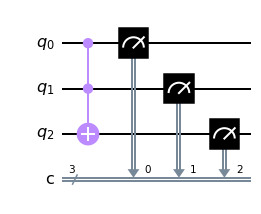

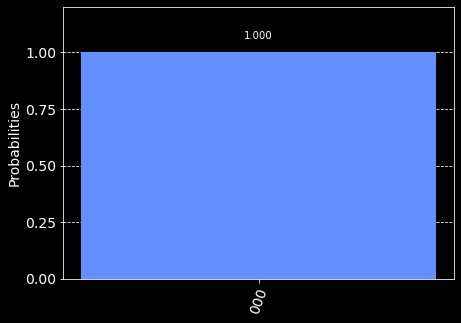

In [67]:
qc4 = QuantumCircuit(3,3)
qc4.ccx(0,1,2)
qc4.measure([0,1,2], [0,1,2])
display(qc4.draw('mpl'))
counts = execute(qc4, qasm_simulator, shots = 10).result().get_counts(qc4)
plot_histogram(counts)

TELEPORTATION

In [83]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex,plot_bloch_vector
from qiskit.extensions import Initialize


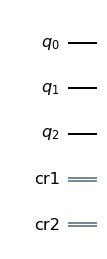

In [84]:
qureg = QuantumRegister(3, 'q')
cr1 = ClassicalRegister(1, name="cr1")
cr2 = ClassicalRegister(1, name="cr2")
circuit = QuantumCircuit(qureg, cr1,cr2)
circuit.draw('mpl')

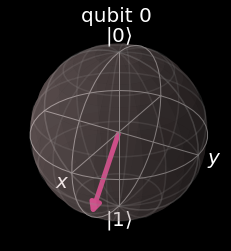

In [85]:
plot_bloch_multivector([(1/9)**0.5 , (8/9)**0.5])

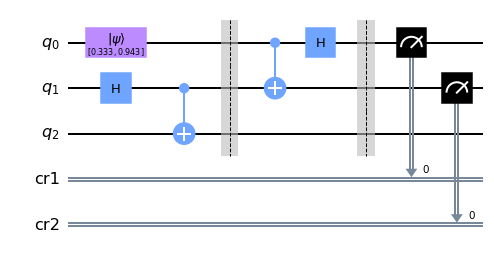

In [86]:
circuit.initialize([(1/9)**0.5 , (8/9)**0.5],0)
#initializing the bloch vector and making the circuit for teleportation
circuit.h(qureg[1])
circuit.cx(qureg[1], qureg[2])
circuit.barrier(qureg[1], qureg[0], qureg[2])
circuit.cx(qureg[0], qureg[1])
circuit.h(qureg[0])
circuit.barrier(qureg[1], qureg[0], qureg[2])
circuit.measure(qureg[0], cr1)
circuit.measure(qureg[1], cr2)
circuit.draw('mpl')

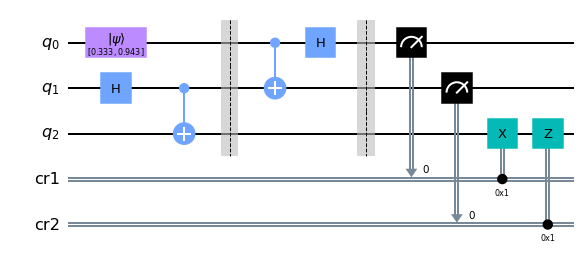

In [87]:
circuit.x(qureg[2]).c_if(cr1, 1)#applying the condition to get the info from alice to bob
circuit.z(qureg[2]).c_if(cr2, 1)
circuit.draw('mpl')

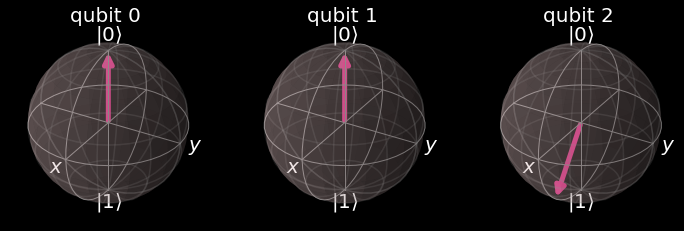

In [88]:
sim = Aer.get_backend('aer_simulator')
circuit.save_statevector()
out_vector = sim.run(circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

DJ ALGORITHM


In [113]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
from matplotlib import style

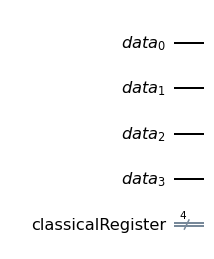

In [119]:
circuit = QuantumCircuit()
classicalRegister = ClassicalRegister(4 , name = 'classicalRegister')
data = QuantumRegister(4, name = 'data')
circuit.add_register(data)
circuit.add_register(classicalRegister)
circuit.draw('mpl')

In [120]:
circuit.h(data)

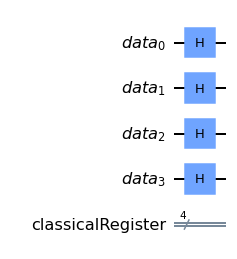

In [121]:
circuit.draw('mpl')

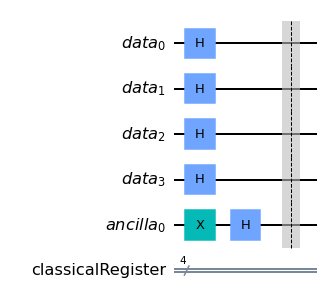

In [122]:
# creating the extra bit or ancilla 
ancilla = QuantumRegister(1, name = 'ancilla')
circuit.add_register(ancilla)
circuit.x(ancilla)
circuit.h(ancilla)
circuit.barrier()
circuit.draw('mpl')

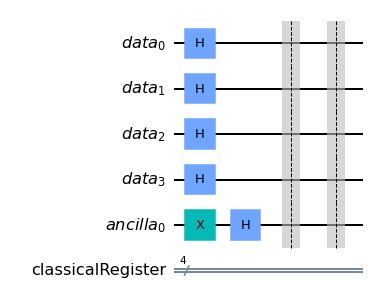

In [123]:
#oracle part
def constant_oracle(circuit):
    return circuit
def balanced_oracle(circuit):
    circuit.cx(data, ancilla)
    return circuit
circuit = constant_oracle(circuit)
circuit.barrier()
circuit.draw('mpl')

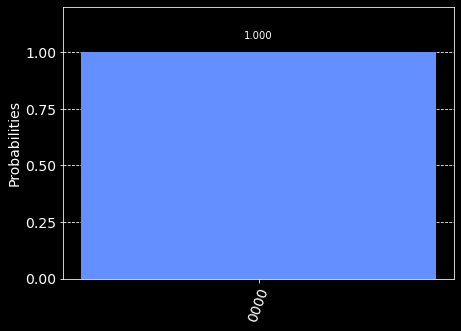

In [124]:
circuit.h(data)
circuit.measure(data, classicalRegister)
sim = Aer.get_backend('qasm_simulator')
result = execute(circuit, sim, shots = 1).result()
plot_histogram(result.get_counts(circuit))

SUPERDENSE CODING


In [144]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram


In [145]:
from matplotlib import style
style.use('dark_background')

In [146]:
def bell_pair(qC, a, b):
    qC.h(a) 
    qC.cx(a,b)
    
def encoded_message(qC, qubit, msg):
    if msg == "00":
        pass    
    elif msg == "10":
        qC.x(qubit) 
    elif msg == "01":
        qC.z(qubit) 
    elif msg == "11":
        qC.z(qubit) 
        qC.x(qubit) 
    else:
        print("ERROR: Sending '00'")
        
def decoded_message(qC, a, b):
    qC.cx(a,b)
    qC.h(a)        
    
    
    

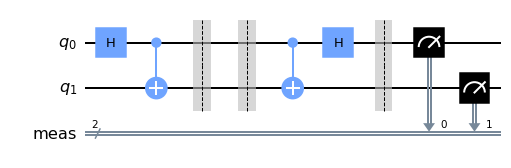

In [148]:
qC = QuantumCircuit(2)
bell_pair(qC, 0, 1)
qC.barrier() 
message = "00"
encoded_message(qC, 0, message)
qC.barrier()
decoded_message(qC, 0, 1)
qC.measure_all()
qC.draw('mpl')

{'00': 1024}


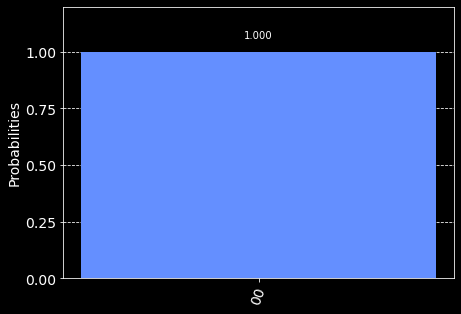

In [150]:
aer_sim = Aer.get_backend('aer_simulator')
job = assemble(qC)
result = aer_sim.run(job).result()
counts = result.get_counts(qC)
print(counts)
plot_histogram(counts)